In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras
import keras.datasets

# Voorbeeld 1

In [3]:
# Stap 1: Laad dataset op en inspecteer de gegevens
xor_data = pd.DataFrame({'P1': [0, 1, 0, 1], 'P2': [0, 0, 1, 1], 'Q': [0, 1, 1, 0]})
x_xor_data = xor_data[['P1', 'P2']]
y_xor_data = xor_data['Q']

In [11]:
# Stap 5: Construeer het ANN-model
inputs_xor = Input(shape=(2,))

# Add multiple hidden layers
x_xor = Dense(4, activation='sigmoid')(inputs_xor)
x_xor = Dense(3, activation='sigmoid')(x_xor)
x_xor = Dense(2, activation='sigmoid')(x_xor)

outputs_xor = Dense(1, activation='sigmoid')(x_xor)

model_xor = Model(inputs_xor, outputs_xor, name="XOR_NN")
model_xor.compile(optimizer=Adam(learning_rate=0.00001), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [12]:
# Stap 6: Train het ANN-model
history_xor = model_xor.fit(x_xor_data, y_xor_data, epochs=200, callbacks=[PlotLossesKeras()], verbose=False)

accuracy
	accuracy         	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	loss             	 (min:    0.727, max:    0.728, cur:    0.727)


In [13]:
model_xor.summary()

Model: "XOR_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38 (152.00 Byte)
Trainable params: 38 (152.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


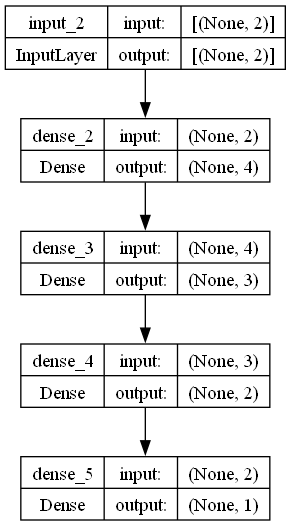

In [14]:
from keras.utils import plot_model

plot_model(model_xor, to_file='model_xor_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
for lay in model_xor.layers:
    print(lay.name)
    print(lay.get_weights())

input_2
[]
dense_2
[array([[-0.9099024 ,  0.8593882 , -0.04588669, -0.8619318 ],
       [ 0.8725281 , -0.267091  , -0.13086247,  0.6307228 ]],
      dtype=float32), array([ 0.00199824, -0.00198828, -0.00198866, -0.00199226], dtype=float32)]
dense_3
[array([[ 0.474578  ,  0.49605745, -0.50572956],
       [ 0.53758156,  0.8516799 ,  0.7748133 ],
       [-0.30011964,  0.7165991 ,  0.2539784 ],
       [-0.150249  ,  0.10859831,  0.85515636]], dtype=float32), array([ 0.00199749, -0.00198613, -0.00199346], dtype=float32)]
dense_4
[array([[-0.25502232,  0.06375808],
       [ 0.08394148,  0.5868237 ],
       [ 0.51526535,  0.9708861 ]], dtype=float32), array([-0.0019948 , -0.00198809], dtype=float32)]
dense_5
[array([[0.8117539 ],
       [0.09135797]], dtype=float32), array([-0.00199542], dtype=float32)]


In [16]:
# Stap 7: Evalueer de kwaliteit van het ANN-model
model_xor.predict(x_xor_data)

1/1 [==============================] - 0s 43ms/step


array([[0.62827045],
       [0.6287332 ],
       [0.62797177],
       [0.62843746]], dtype=float32)

In [17]:
model_xor.evaluate(x_xor_data, y_xor_data)

1/1 [==============================] - 0s 85ms/step - loss: 0.7272 - accuracy: 0.5000


[0.7272337675094604, 0.5]

# Voorbeeld 2

In [19]:
# Stap 1 & 4: Laad de dataset op splits de dataset op in een training- en test dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [20]:
# Stap 2: Data management manipulaties
### 60000 training images met 28x28 pixels en hun geassocieerd nummer
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [21]:
### Transformeer de 2D-images in 1D-vectoren
x_train = x_train.reshape((-1, 784))  # 28 x 28 = 784
x_test = x_test.reshape((-1, 784))
print(x_train.shape)  # (60000, 784)

(60000, 784)


In [22]:
### Targetwaarden getransformeerd in One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
# Stap 5: construeer het ANN-model
### De lagen van het neurale netwerk voorbereiden
inputs = Input(shape=(784,))
x = BatchNormalization()(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
### construer het neurale netwerk model
model = Model(inputs, outputs, name='MNIST_Crusher')
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),

              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "MNIST_Crusher"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 58186 (227.29 KB)
Trainable params: 56618 (221.16 KB)
Non-trainable params: 1568 (6.12 KB)
______________

In [24]:
# Stap 6: Train het ANN-model
history = model.fit(
    x_train,  # training data
    y_train,  # training targets
    epochs=5,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.2785 - accuracy: 0.9154 - val_loss: 0.5665 - val_accuracy: 0.9492
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1354 - accuracy: 0.9577 - val_loss: 0.5429 - val_accuracy: 0.9613
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1035 - accuracy: 0.9662 - val_loss: 0.4609 - val_accuracy: 0.9612
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0844 - accuracy: 0.9731 - val_loss: 0.5152 - val_accuracy: 0.9637
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0764 - accuracy: 0.9749 - val_loss: 0.2938 - val_accuracy: 0.9669


In [25]:
# Stap 7: Evalueer de kwaliteit van het ANN-model
model.evaluate(x_test, y_test)
### Voorspel de eerste 5 images uit de test dataset
print(np.argmax(model.predict(x_test[:5]), axis=1))  # [7 2 1 0 4]
### vergelijk met het werkelijke nummer
print(np.argmax(y_test[:5], axis=1))  # [7 2 1 0 4]

1/1 [==============================] - 0s 53ms/step
[7 2 1 0 4]
[7 2 1 0 4]


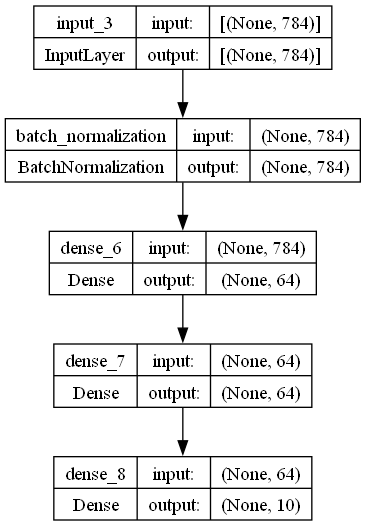

In [30]:
plot_model(model, to_file='model_xor_plot.png', show_shapes=True, show_layer_names=True)

# Voorbeeld 3

In [38]:
# Stap 1: Laad dataset op en inspecteer de gegevens
cereals = pd.read_csv('datasets/cereals US.csv', delimiter=';')
cereals.info()
cereals.describe()  #opmerking: enkel visualisatie van de kwantitatieve variabelen
cereals.isna().sum().sum()

# Stap 2: Voer de nodige data management manipulaties door
x_cereals = cereals[['Calories', 'Protein (g)', 'Fat', 'Sodium', 'Dietary Fiber']].copy()
y_cereals = cereals[['Rating']].copy()

print(x_cereals.isna().sum())
print(y_cereals.isna().sum())

# Stap 3: Normaliseer de data
### min-max normalisatie
def minmax_norm(col):
    minimum = col.min()
    maximum = col.max()
    return (col - minimum) / (maximum - minimum)

# x_cereals_norm = pd.DataFrame()
# for column in x_cereals:
#     x_cereals_norm[column] = minmax_norm(x_cereals[column])

x_cereals_norm = x_cereals.apply(minmax_norm, axis=0)

# Stap 4: splits de dataset op in een training- en test dataset
from sklearn.model_selection import train_test_split

x_train_cer, x_test_cer, y_train_cer, y_test_cer = train_test_split(x_cereals_norm, y_cereals, test_size=0.2, random_state=42)


# Stap 5: Construeer het ANN-model
### Bereid de lagen van het neuraal network voor
inputs_cer = Input(shape=(5,))
x_cer = Dense(32, activation='relu')(inputs_cer)
x_cer = Dense(16, activation='relu')(x_cer)
x_cer = Dense(8, activation='relu')(x_cer)
x_cer = Dense(4, activation='relu')(x_cer)
outputs_cer = Dense(1, activation='linear')(x_cer)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cereal Name            71 non-null     object
 1   Manufacturer           71 non-null     object
 2   Type                   71 non-null     object
 3   Calories               71 non-null     int64 
 4   Protein (g)            71 non-null     int64 
 5   Fat                    71 non-null     int64 
 6   Sodium                 71 non-null     int64 
 7   Dietary Fiber          71 non-null     object
 8   Carbs                  71 non-null     object
 9   Sugars                 71 non-null     int64 
 10  Display Shelf          71 non-null     int64 
 11  Potassium              71 non-null     int64 
 12  Vitamins and Minerals  71 non-null     int64 
 13  Serving Size Weight    71 non-null     object
 14  Cups per Serving       71 non-null     object
 15  Rating                 71

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [39]:
import math
from keras.src.optimizers import RMSprop

### Construeer het neurale network model
model_cer = Model(inputs=inputs_cer, outputs=outputs_cer, name='Cereals')
model_cer.summary()

model_cer.compile(optimizer=RMSprop(learning_rate=0.01), loss='mae', metrics=['mape'])

# Step 6: Train het ANN-model
loss, mape = model_cer.evaluate(x_test_cer, y_test_cer, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test MAPE: {mape}")

predicted_values = model_cer.predict(x_test_cer).flatten()

actual_values = y_test_cer.values.flatten()
mape = np.mean(np.abs((predicted_values - actual_values) / actual_values)) * 100
rmse = math.sqrt(np.mean((predicted_values - actual_values) ** 2))

# Stap 7: Evalueer de kwaliteit van het ANN-model
model_cer.evaluate(x_test_cer, y_test_cer)
predicted_values = model_cer.predict(x_test_cer)
pred = []
for i in range(predicted_values.size):
    pred = pred + [predicted_values[i][0]]
predicted = pd.Series(pred, name='predicted')
actual = y_test_cer['Rating'].copy()
actual = actual.reset_index()
actual = actual['Rating']
mape = ((predicted - actual).abs() / actual).mean()
rmse = math.sqrt(((predicted - actual) ** 2).mean())

NameError: name 'inputs_cer' is not defined